In [1]:
import os.path
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('Qt5Agg')
%matplotlib widget

from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter
from pyofss import temporal_power, spectral_power, lambda_to_nu, nu_to_lambda
from pyofss import single_plot, map_plot, waterfall_plot, labels
from pyofss.field import energy
import pandas as pd

OpenclFibre is not activated, check if pyopencl and reikna modules are installed


In [2]:
from pyofss.domain import lambda_to_omega
from pyofss.modules.nonlinearity import calculate_gamma
gamma_passive = 3
gamma_active = 4
print("gamma_passive = ", gamma_passive)
print("gamma_active = ", gamma_active)

gamma_passive = calculate_gamma(2.7*(10**(-20)), 37.8, lambda_to_omega(1035))
gamma_active = calculate_gamma(2.7*(10**(-20)), 29, lambda_to_omega(1035))


gamma_passive =  3
gamma_active =  4


In [3]:
import sys 
peak_power = sys.argv[1]

domain = Domain(samples_per_bit = 2**14, bit_width = 200.0, total_bits = 1, centre_nu = lambda_to_nu(1035))
gaussian = Gaussian(name="initial_pulse", peak_power = 50., width = 3., C = 100, using_fwhm=True)
A = gaussian.generate(domain.t)
E = energy(A, domain.t)
print("initial energy = ", E)

initial energy =  0.15967005291468395


NameError: name 'a' is not defined

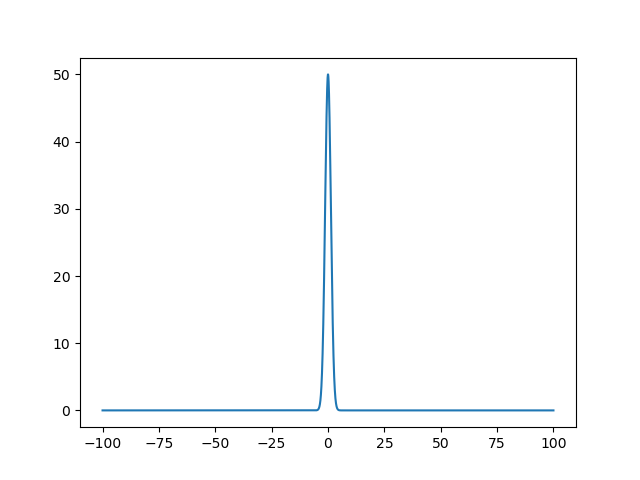

In [4]:
def check_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
        print("Directory: ", dir, " is created!")

Dir = "C:/Users/Karin/PycharmProjects/pyofss-master/mamyshev_oscillator_test3_raman"
GraphDir = os.path.join(Dir, "graph")
plt.clf()
plt.plot(domain.t, temporal_power(A))
check_dir(GraphDir)
plt.savefig(os.path.join(GraphDir,f"initial_pulse{a}"))
plt.show()

In [4]:
a = 5
os.path.join(GraphDir,f"initial_pulse{a}")

NameError: name 'GraphDir' is not defined

In [4]:
length_one_cycle = 9*1e-3
t_one_cycle = (length_one_cycle*1.45)*1e12/Domain.vacuum_light_speed
print(f'{t_one_cycle*1e-3} ns')

43.530114423358846 ns


In [5]:
Dir = 'C:/Users/Karin/PycharmProjects/pyofss-master/mamyshev_oscillator_test6_raman/'
sys = System( domain, A)
print("before fibre: Emax(spec)", np.max(spectral_power(sys.field)))
print(f'filter_1: cental_nu = {lambda_to_nu(1040)}')
print(f'filter_2: cental_nu = {lambda_to_nu(1030)}')

for i in range(4):
    cycleDir = os.path.join(Dir, f'cycle{int(i)}')
    sys.add(Filter(name="filter_1", width_nu=(Domain.vacuum_light_speed/(1040**2))*4, offset_nu=(lambda_to_nu(1040) - lambda_to_nu(1035)),
                    m=1, channel=0, using_fwhm=True, type_filt = "reflected"))
    sys.add(Fibre(name="1_passive_fibre", length=1*1e-3, gamma=gamma_passive, beta=np.array([0, 0, 22.2]), cycle=f'cycle{int(i)}', total_steps=100, traces=100, method='ss_symmetric', use_all="hollenbeck", save_represent="both"))
    sys.add(Fibre(name="2_active_fibre", length=2.5*1e-3, gamma=gamma_active, beta=np.array([0, 0, 24.9]), cycle=f'cycle{int(i)}',total_steps=250, traces=100, method='ss_symmetric', use_all="hollenbeck", small_signal_gain = 25, E_sat = 10.0, save_represent="both"))
    # sys.add(Fibre(name="3_passive_fibre", length=1*1e-3, gamma=gamma_passive, beta=np.array(
    #     [0, 0, 22.2]), cycle='cyclef{int(i)}', total_steps=100, traces=100, method='ss_symmetric', use_all="hollenbeck", save_represent="both"))
    # sys.add(Splitter(name="splitter", loss = 0.4))
    # sys.add(Filter(name="filter_2", width_nu=(Domain.vacuum_light_speed/(1030**2))*4, offset_nu=(lambda_to_nu(1030) - lambda_to_nu(1035)),
    #                 m=1, channel=0, using_fwhm=True, type_filt = "reflected"))
    # sys.add(Fibre(name="4_passive_fibre", length=1*1e-3, gamma=gamma_passive, beta=np.array([0, 0, 22.2]), cycle=f'cycle{int(i)}', total_steps=100, traces=100, method='ss_symmetric', use_all="hollenbeck", save_represent="both"))
    # sys.add(Fibre(name="5_active_fibre", length=2.5*1e-3, gamma=gamma_active, beta=np.array(
    #     [0, 0, 24.9]), cycle=f'cycle{int(i)}', total_steps=2500, traces=100, method='ss_symmetric', use_all="hollenbeck", small_signal_gain=25, E_sat=30.0, save_represent="both"))
    # sys.add(Fibre(name="6_passive_fibre", length=1*1e-3, gamma=gamma_passive, beta=np.array([0, 0, 22.2]), cycle='cycle{int(i)}', total_steps=100, traces=100, method='ss_symmetric', use_all="hollenbeck", save_represent="both"))
    # sys.add(Splitter(name="splitter", loss = 0.9))
  
sys.run()

# sys['passive_fibre_1'].print_refrence_length(domain, A)


before fibre: Emax(spec) 0.0002549325116708455
filter_1: cental_nu = 288.26197884615385
filter_2: cental_nu = 291.0606388349514
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Using general expression for nonlinearity
Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\nonlinearity.py:218: RuntimeWarning: invalid value encountered in true_divide
  term_ss_all = np.where(np.abs(B) > 1e-15, self.ss_factor / B, 0.0) * ifft(self.omega * fft(term_all * A))


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\storage.py:443: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  As = np.vstack(
c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000196*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000286*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000065*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000135*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000058*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


c:\Users\Karin\PycharmProjects\pyofss-master\pyofss\modules\stepper.py:145: UserWarning: h must be much less than dispersion length (L_D) and the nonlinear length (L_NL)
                        now now the minimum of the characteristic distances is equal to 0.000117*km* 
                         step is equal to 1e-05*km*
  warnings.warn(


Caching linear factor


In [6]:
directory = "mamyshev_oscillator_test_saving_last_cycle"
# sys.save_df_to_csv(directory, "laser_test")
# sys.save_last_cycle_df_to_csv(directory, is_temporal=True)
# sys.save_last_cycle_df_to_csv(directory, is_temporal=False)
sys.init_df(is_temporal=True)
sys.init_df(is_temporal=False)

In [16]:
from pyofss.field import energy, max_peak_params, spectrum_width_params
from pyofss import Domain, System, Gaussian, Fibre, Filter, Splitter, FibrePlotter
from pyofss import labels
from scipy.signal import find_peaks
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 100

def get_caption(folder_name):
    def sorting_func(name, param_string):
                name = name.split(f"_{param_string}_", 1)[1]
                sub = name.split("_", 1)[1] if (len(name.split("_", 1)) > 0) else ""
                name = name.replace(sub, "")
                name = name.replace("_", "")
                return float(name)
    caption =  f"Esat_1 = {sorting_func(folder_name, 'Esat_1')}, Esat_2 = {sorting_func(folder_name, 'Esat_2')}, La_1 = {sorting_func(folder_name, 'La_1')}, La_2 = {sorting_func(folder_name, 'La_2')}"       
    return caption


def draw_heat_map(df, domain, is_temporal=True, prominence=0.005, title="laser", subplot_spec=None, fig=None):
    if (is_temporal):
        x = domain.t
        x_label = labels["t"]
    else: 
        x = domain.nu
        x_label = labels["nu"]
    y = df.values
    z = df.index.get_level_values('z [mm]').values
    d_x = abs(x[1] - x[0])
    plotter = FibrePlotter(x, y, z, x_label, labels["P_t"], labels["z"])
    plotter.draw_heat_map(0, prominence=prominence, is_temporal=is_temporal, subplot_spec=subplot_spec, fig=fig, title=title, vmin=0)


def draw_double_plot(df, subplot_spec=None, fig=None, is_temporal = True):
    if (fig and subplot_spec is not None):
        inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                                                    subplot_spec=subplot_spec, wspace=0.1, hspace=0.1)
        ax1 = plt.subplot(inner[0, 0])
    else:
        fig, ax1 = plt.subplots(figsize=(30, 6))

    color = 'tab:red'
    ax1.set_xlabel(labels["z"])

    if (is_temporal):
        ax1.set_ylabel(labels["t"], color=color)
    else:
        ax1.set_ylabel(labels["nu"], color=color)

    ax1.plot(df.index.get_level_values(
        'z [mm]').values, df["duration"].values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Adding Twin Axes to plot using dataset_2
    ax2 = ax1.twinx()

    color = 'tab:green'

    if (is_temporal):
        ax2.set_ylabel(labels["P_t"], color=color)
    else:
        ax2.set_ylabel(labels["P_nu"], color=color)
        
    ax2.plot(df.index.get_level_values(
        'z [mm]').values, df["max_value"].values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.show()


def get_duration(P, d_x, prominence = 0.01):
    heigth_fwhm, fwhm, left_ind, right_ind = max_peak_params(
        P, prominence=prominence)
    return fwhm*d_x

def get_duration_spec(P, d_x, prominence = 0.0001):
    heigth_fwhm, fwhm, left_ind, right_ind = spectrum_width_params(
        P, prominence=prominence)
    return abs(fwhm)*d_x

def gaussian(x, a, x0, sigma):
    return a*np.exp(-((x-x0)**2)/(2*sigma**2))

def field_animation(df, domain, path_to_animation, is_temporal=True):
    if (is_temporal):
        x = domain.t
        x_label = labels["t"]
    else: 
        x = domain.nu
        x_label = labels["nu"]
    y = df.values
    z = df.index.get_level_values('z [mm]').values
    
    plotter = FibrePlotter(x, y, z, x_label, labels["P_t"], labels["z"])
    anim = plotter.draw_animation()
    writervideo = animation.FFMpegWriter(fps=100)
    anim.save(path_to_animation, writer=writervideo)

def get_laser_info(df_laser, domain, cycle, caption, path_to_graph, is_temporal):
    if (is_temporal):
        additive = "temp"
        prominence = 0.1
    else:
        additive = "spec"
        prominence = 0.0001
    fig = plt.figure(figsize=(20, 10))
    outer = gridspec.GridSpec(2, 1, wspace=0.1, hspace=0.2)   
    characteristic = ["max_value", "duration"]
    iterables = [characteristic]
    index = pd.MultiIndex.from_product(iterables,  names=["charact"]) 
    df_results = pd.DataFrame(index=df_laser.index, columns=index)
    draw_heat_map(df_laser.loc[(cycle)], domain, is_temporal, prominence=prominence, title=caption, subplot_spec=outer[0], fig=fig)

    if (is_temporal):
        x = domain.t
        d_x = abs(x[1] - x[0])
        df_results['max_value'] = df_laser.max(axis=1).values
        df_results['duration'] = df_laser.apply(lambda row: get_duration(row, d_x, prominence), axis=1).values
        draw_double_plot(df_results.loc[(cycle)], outer[1], fig)
    else:
        x = domain.nu
        d_x = abs(x[1] - x[0])
        df_results['duration'] = df_laser.apply(
            lambda row: get_duration_spec(row, d_x, prominence), axis=1).values
        draw_double_plot(df_results.loc[(cycle)], outer[1], fig)
        
    fig.savefig(os.path.join(path_to_graph, f"info_{cycle}_{additive}.png"))

    anim = field_animation(
        df_laser.loc[(cycle)], domain, os.path.join(path_to_graph,f"animation_{cycle}_{additive}.mp4"), is_temporal)
    return df_results


def get_output_field(df_laser, last_cycle):
    z_output = df_laser.index.get_level_values('z [mm]').values[-1]
    last_fibre = df_laser.loc[(last_cycle, "2_active_fibre")]
    z_output = last_fibre.index.get_level_values('z [mm]').values[-1]
    output_field = last_fibre.loc[(z_output)]
    return output_field

In [ ]:
graph_dir = os.path.join(directory, "graph")
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

cycle_names = list(set(sys.df_temp.index.get_level_values('cycle').values))
cycle_names.sort()

result_temp = get_laser_info(sys.df_temp, domain, cycle_names[-1], "captio_tempn", graph_dir, True)
result_temp.to_csv(os.path.join(graph_dir, "laser_info_temp.csv"))

result_spec = get_laser_info(sys.df_spec, domain, cycle_names[-1], "caption_spec", graph_dir, False)
result_spec.to_csv(os.path.join(graph_dir, "laser_info_spec.csv"))

In [34]:
graph_dir = os.path.join(directory, "graph")
if not os.path.exists(graph_dir):
    os.makedirs(graph_dir)

x = domain.t
d_x = x[1] - x[0]
output_field_last = get_output_field(sys.df_temp, cycle_names[-1])
output_field_prev = get_output_field(sys.df_temp, cycle_names[-2])
E_last = np.amax(output_field_last)
E_prev = np.amax(output_field_prev)
delta_E = (abs(E_last - E_prev)/E_prev)
lines = []
lines.append(f"E_last = {E_last}")
print(f"delta_E = {delta_E*100} %")
duration_last = get_duration(output_field_last, d_x, 0.01)
duration_prev = get_duration(output_field_prev, d_x, 0.01)
delta_duraion = (abs(duration_last - duration_prev)/duration_prev)
lines.append(f"duration_last = {duration_last}")
lines.append(f"delta_duraion = {delta_duraion*100} %")
prominence = E_last/100
peaks, _ = find_peaks(output_field_last, height=0, prominence=prominence)
lines.append(f"peaks = {peaks}")

if delta_E < 0.00001 and delta_duraion < 0.0002:
    lines.append("generation is stable")
else:
    lines.append("generation is Not stable")

with open(os.path.join(graph_dir, "output_info.txt"), 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

# fig, ax = plt.subplots(2, 1)
# ax[0].plot(x, output_field_last)
# ax[0].plot(x, output_field_prev)
# ax[0].scatter(x[peaks], output_field_last[peaks])
# # df_total_info = pd.DataFrame()
# plt.show()

delta_E = 1.5989206455827236 %


In [32]:
lines

['E_last = 5616.491914719821',
 'duration_last = 6.292270017176249',
 'delta_duraion = 4.012978814702231 %',
 'peaks = [7928]',
 'generation is Not stable']

In [13]:
file_name = os.path.join(dir, f"laser.csv")
with open(file_name, "w") as f:
    df_all.to_csv(file_name)

(804, 16384)

In [ ]:
sys['passive_fibre_1'].print_refrence_length(domain, A)

In [15]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 1000)
df_all

0             1             2      \
cycle  fibre           z [mm]                                             
cycle0 1_passive_fibre 10.0    2.465190e-31  3.081488e-31  9.860761e-32   
                       20.0    1.232595e-32  4.560602e-31  8.011869e-31   
                       30.0    4.560602e-31  2.465190e-31  1.109336e-31   
                       40.0    1.097010e-30  6.409495e-31  4.560602e-31   
                       50.0    3.599178e-30  1.047706e-30  3.081488e-31   
                       60.0    2.083086e-30  1.972152e-30  2.021456e-30   
                       70.0    2.465190e-30  3.562200e-30  6.532754e-31   
                       80.0    5.374115e-30  6.754622e-30  7.888609e-31   
                       90.0    3.648482e-30  4.190824e-30  4.190824e-30   
                       100.0   2.871947e-30  5.041314e-30  2.563798e-30   
                       110.0   4.930381e-30  2.280301e-30  2.095412e-31   
                       120.0   8.332343e-30  3.944305e-30  6.532754e-31   
                       130.0   3.007532e-30  2.871947e-30  2.095412e-30   
                       140.0   1.089614e-29  6.520428e-30  4.930381e-31   
                       150.0   1.799589e-29  7.309289e-30  4.190824e-30   
                       160.0   1.066195e-29  1.608537e-29  1.426113e-29   
                       170.0   5.127596e-30  1.508696e-29  1.115499e-29   
                       180.0   1.214106e-29  3.007532e-30  1.209176e-29   
                       190.0   2.746222e-29  1.281899e-29  4.560602e-31   
                       200.0   2.634056e-29  8.529559e-30  7.013466e-30   
                       210.0   7.013466e-30  1.932709e-29  1.114266e-29   
                       220.0   1.633189e-29  1.424880e-29  3.944305e-30   
                       230.0   1.109336e-29  2.228532e-29  1.521022e-29   
                       240.0   2.770874e-29  1.169733e-29  1.169733e-29   
                       250.0   6.986349e-29  8.874685e-30  1.307783e-29   
                       260.0   4.299292e-29  4.251221e-29  2.446701e-29   
                       270.0   6.884044e-29  2.884273e-29  2.476284e-29   
                       280.0   5.621867e-29  2.634056e-29  2.461493e-29   
                       290.0   4.190824e-29  4.580324e-29  2.367815e-29   
                       300.0   3.870349e-29  3.042045e-29  3.156676e-29   
                       310.0   4.680164e-29  3.059301e-29  2.526820e-29   
                       320.0   4.630860e-29  4.453366e-29  1.755216e-29   
                       330.0   4.974754e-29  4.388039e-29  2.526820e-29   
                       340.0   7.052910e-29  6.642455e-29  1.543209e-29   
                       350.0   5.926318e-29  4.275873e-29  4.146450e-29   
                       360.0   7.656881e-29  5.218808e-29  2.694453e-29   
                       370.0   9.778177e-29  6.434147e-29  3.256516e-29   
                       380.0   1.374590e-28  6.434147e-29  4.597580e-29   
                       390.0   1.234814e-28  5.700753e-29  8.156082e-29   
                       400.0   9.123669e-29  6.409495e-29  9.028760e-29   
                       410.0   1.033038e-28  4.517461e-29  6.612873e-29   
                       420.0   5.978087e-29  7.555808e-29  6.800228e-29   
                       430.0   7.322848e-29  5.784569e-29  5.207715e-29   
                       440.0   8.716913e-29  6.218443e-29  5.469025e-29   
                       450.0   8.358228e-29  8.923989e-29  6.421821e-29   
                       460.0   8.806892e-29  8.228805e-29  7.045514e-29   
                       470.0   1.015905e-28  7.499109e-29  6.217210e-29   
                       480.0   1.234814e-28  7.130563e-29  5.127596e-29   
                       490.0   1.351048e-28  5.699520e-29  6.034786e-29   
                       500.0   1.254905e-28  5.623099e-29  7.543482e-29   
                       510.0   9.600684e-29  7.829444e-29  6.473590e-29   
                       520.0   1.044871e-28  7.293266e-29  6.30

In [ ]:
single_plot(domain.nu, spectral_power(sys.field), label="after active fiber")
single_plot(domain.t, temporal_power(sys.field), label="after active fiber")
print("after fibre, Emax(spec) = ", np.max(spectral_power(sys.field)))
print(f"max is {domain.nu[np.argmax(spectral_power(sys.field))]} nu")

In [ ]:
single_plot(domain.nu, spectral_power(A), label="after active fiber")
print("before fibre, Emax(spec) = ", np.max(spectral_power(A)))
print(f"max is {domain.nu[np.argmax(spectral_power(A))]} nu")

In [ ]:
single_plot(domain.t, temporal_power(sys.field), label="after active fiber")
print("after fibre, Emax(temp) = ", np.max(temporal_power(sys.field)))
print(f"max is {domain.t[np.argmax(temporal_power(sys.field))]} t")

In [ ]:
E = energy(A, domain.t)
print("total pulse energy before fiber, Etot = ", E)

In [ ]:
dir = 'C:/Users/Karin/PycharmProjects/pyofss-master/amplification_fiber1'
storage = sys['active_fibre_1'].stepper.storage
# (x, y, z) = storage.get_plot_data()
storage.draw_animation()

In [ ]:
storage.save_all_storage_to_dir(dir = dir)

storage.draw_animation()

In [ ]:
single_plot(domain.t, temporal_power(sys.field), label="after active fiber")
print("peak pulse energy after fibre, Emax = ", np.max(temporal_power(sys.field)))